# <center> Ekman Overturning </center>

Test Model Mean Overturning with Theoretical Overturning from wind forcing

In [1]:
# Load Modules
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
path = '/noc/msm/scratch/students/hb1g13/Mobilis'

In [2]:
# Grid data
gridfilepath = path + '/3daynokpp/'
file2 = netCDF4.Dataset(gridfilepath + 'grid.nc', 'r')
Zp = file2.variables['Zp1'][:]
Z = file2.variables['Z'][:]
Yp = file2.variables['Yp1'][:]
Yc = file2.variables['Y'][:]
Zmatrix = np.zeros((len(Z), len(Yc)))
Zmatrix[:, :] = 1
dx = Yc[1]-Yc[0]  # Find Resolution
dz = Zp[0:len(Zp)-1]-Zp[1:len(Zp)]
Zmatrix = np.apply_along_axis(np.multiply, 0, Zmatrix, dz)
X = file2.variables['Xp1'][:]

In [3]:
# Constant Parameters
alpha = 2.000000E-04
G = -9.81
C_p = 3985
Res = 5000
Ly = 2000e3
Lx = 1000e3 
H = 2985 
nz = 30 
f = -1.000000E-04
Beta = 1.000000E-11
tref = 4.0
alpha = 2.000000E-04
G = -9.81
rho_0 = 999.8
dz = Zp[0:len(Zp)-1]-Zp[1:len(Zp)]
pi = math.pi

\begin{equation}
\bar{\psi}(y, z)=\iint \overline{v}\, \mathrm{d}x\, \mathrm{d}z,
\end{equation}

In [4]:
filename = path+'/3daynokpp/Tav.nc'
file2read = netCDF4.Dataset(filename,'r')
V = file2read.variables["VVEL"][:]
Vtave = np.mean(V,axis = 0)
Vtave[Vtave == 0] = np.nan
Vzone = np.nansum(Vtave,axis = 2)*dx
# Got rid of for loop here (much quicker!!)
psi2 = np.apply_along_axis(np.multiply,0,Vzone,dz)
psi = np.cumsum(-psi2[::-1,:],axis=0)[::-1,:]
npad = ((0,1), (0,0))
# Pad with zeros at bottom
psi = np.pad(psi, pad_width=npad, mode='constant', constant_values=0)
y = Yc/1000
Psi = psi/10**6  # Convert to Sv
# Test Extremes
filename = path+'/Closeddaynokpp/Tav.nc'
file2read = netCDF4.Dataset(filename,'r')
V = file2read.variables["VVEL"][:]
Vtave = np.mean(V,axis = 0)
Vzone = np.nansum(Vtave,axis = 2)*dx
# Got rid of for loop here (much quicker!!)
psi2 = np.apply_along_axis(np.multiply,0,Vzone,dz)
psi = np.cumsum(-psi2[::-1,:],axis=0)
npad = ((0,1), (0,0))
# Pad with zeros at bottom
psi = np.pad(psi, pad_width=npad, mode='constant', constant_values=0)
y = Yc/1000
Psi3 = psi/10**6  # Convert to Sv

/noc/users/hb1g13/.conda/envs/my_anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)


\begin{equation}
\bar{\psi}(y, z)= \frac{\tau _s}{\rho _0 f},
\end{equation}

In [5]:
nx = np.round(Lx/Res)
ny = np.round(Ly/Res)
dx = np.ones(nx)*Res
dy = np.ones(ny)*Res
x = (np.cumsum(dx)-dx/2)-Lx/2
y = (np.cumsum(dy)-dy/2)-Ly/2
[Z1, Y, X] = np.meshgrid(Z,y,x)
tau = 0.2*((np.sin((Y+Ly/2)*(pi/Ly)))) 
psi = - np.apply_along_axis(np.divide,0,tau,rho_0*(f+(Beta*np.cumsum(dy))))
psi = np.sum(5000*psi,axis=2)/10**6
npad = ((0,0), (0,2))
psi = np.pad(psi[:,0:-1], pad_width=npad, mode='constant', constant_values=0)

Now Plot to show that:

\begin{equation}
\bar{\psi}(y, z) = \iint \overline{v}\, \mathrm{d}x\, \mathrm{d}z = \frac{\tau _s}{\rho _0 f}
\end{equation}

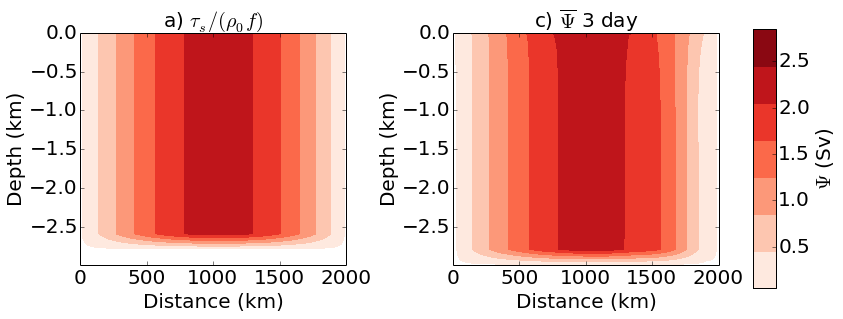

In [15]:
fig = plt.figure(figsize=(10.5,4.5))
Psi_levs = np.arange(0.05, 3.05, .4)
Psi_ticks =np.arange(0, 3., .5)

# Theory
ax = fig.add_subplot(1, 2, 1)
p=ax.contourf(Yc/1000,Zp/1000,np.transpose(psi),Psi_levs,cmap=plt.cm.Reds)
ax.set_title(r'a) $ \tau_s / (\rho_0 f)}$', fontsize=20)
ax.set_xlabel('Distance (km)', fontsize=20)
ax.set_ylabel('Depth (km)', fontsize=20)
ax.tick_params(labelsize=20)

# Model 3day
ax = fig.add_subplot(1, 2, 2)
ax.contourf(Yp/1000,Zp/1000,Psi,Psi_levs,cmap=plt.cm.Reds)
ax.set_title(r'c) $\overline{\Psi}$ 3 day', fontsize=20)
ax.set_xlabel('Distance (km)', fontsize=20)
ax.set_ylabel('Depth (km)', fontsize=20)
ax.tick_params(labelsize=20)
plt.tight_layout()

# Add colour bar
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$ (Sv)', fontsize=20)
cbar.ax.tick_params(labelsize=20) 

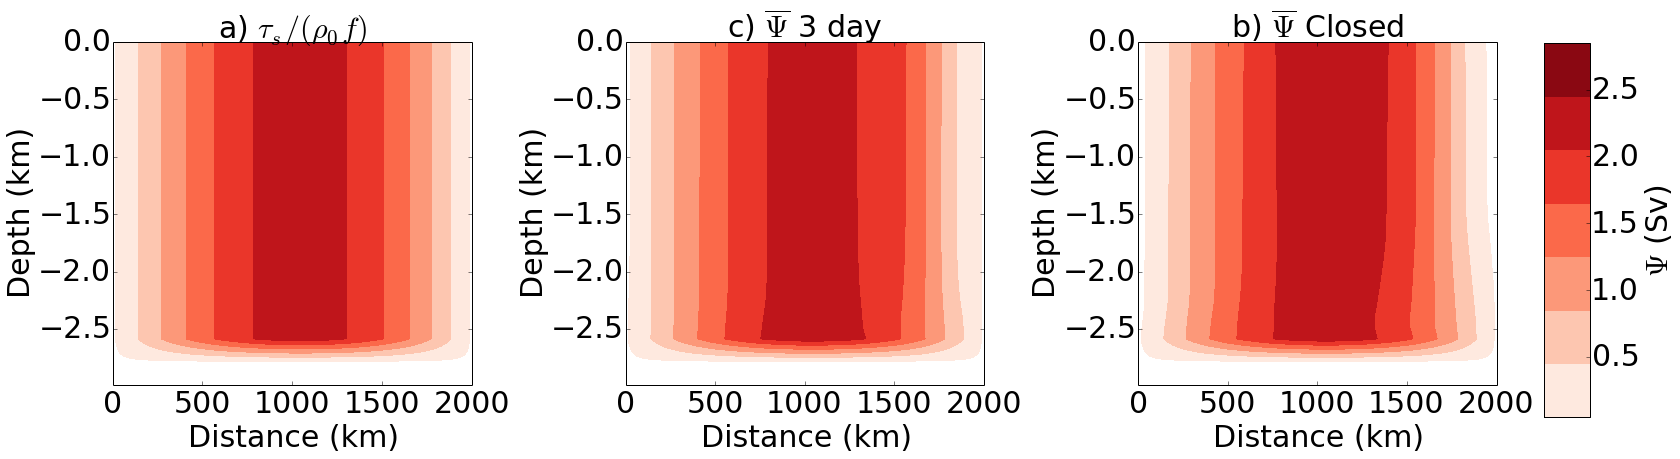

In [7]:
fig = plt.figure(figsize=(21.5,6.5))
Psi_levs = np.arange(0.05, 3.05, .4)
Psi_ticks =np.arange(0, 3., .5)

# Theory
ax = fig.add_subplot(1, 3, 1)
p=ax.contourf(Yc/1000,Zp/1000,np.transpose(psi),Psi_levs,cmap=plt.cm.Reds)
ax.set_title(r'a) $ \tau_s / (\rho_0 f)}$', fontsize=30)
ax.set_xlabel('Distance (km)', fontsize=30)
ax.set_ylabel('Depth (km)', fontsize=30)
ax.tick_params(labelsize=30)

# Model 3day
ax = fig.add_subplot(1, 3, 2)
ax.contourf(Yp/1000,Zp/1000,Psi,Psi_levs,cmap=plt.cm.Reds)
ax.set_title(r'c) $\overline{\Psi}$ 3 day', fontsize=30)
ax.set_xlabel('Distance (km)', fontsize=30)
ax.set_ylabel('Depth (km)', fontsize=30)
ax.tick_params(labelsize=30)

# Model Closed
ax = fig.add_subplot(1, 3, 3)
ax.contourf(Yp/1000,Zp/1000,Psi3,Psi_levs,cmap=plt.cm.Reds)
ax.set_title(r'b) $\overline{\Psi}$ Closed', fontsize=30)
ax.set_xlabel('Distance (km)', fontsize=30)
ax.set_ylabel('Depth (km)', fontsize=30)
ax.tick_params(labelsize=30)
plt.tight_layout()

# Add colour bar
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax, ticks=Psi_ticks)
cbar.ax.set_ylabel('$\Psi$ (Sv)', fontsize=30)
cbar.ax.tick_params(labelsize=30) 